### We will see fine-tuning in this code

In [ ]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagenerator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
test_datagenerator = ImageDataGenerator(rescale=1./255)

In [ ]:
!unzip /content/train.zip
!unzip /content/validation.zip
!unzip /content/test.zip

In [ ]:
train_generator = train_datagenerator.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagenerator.flow_from_directory(
        '/content/validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [ ]:
memoryM = model.fit(
      train_generator,
      steps_per_epoch = 100,
      epochs = 30,
      validation_data = validation_generator,
      validation_steps = 50,
      verbose = 2)

Epoch 1/30
100/100 - 32s - loss: 0.5956 - acc: 0.6985 - val_loss: 0.4506 - val_acc: 0.8080 - 32s/epoch - 325ms/step
Epoch 2/30
100/100 - 21s - loss: 0.4930 - acc: 0.7750 - val_loss: 0.3901 - val_acc: 0.8360 - 21s/epoch - 210ms/step
Epoch 3/30
100/100 - 20s - loss: 0.4249 - acc: 0.8160 - val_loss: 0.3389 - val_acc: 0.8540 - 20s/epoch - 196ms/step
Epoch 4/30
100/100 - 20s - loss: 0.4106 - acc: 0.8195 - val_loss: 0.3232 - val_acc: 0.8560 - 20s/epoch - 195ms/step
Epoch 5/30
100/100 - 20s - loss: 0.3879 - acc: 0.8145 - val_loss: 0.2957 - val_acc: 0.8740 - 20s/epoch - 196ms/step
Epoch 6/30
100/100 - 20s - loss: 0.3712 - acc: 0.8300 - val_loss: 0.2803 - val_acc: 0.8850 - 20s/epoch - 195ms/step
Epoch 7/30
100/100 - 20s - loss: 0.3645 - acc: 0.8450 - val_loss: 0.2754 - val_acc: 0.8840 - 20s/epoch - 197ms/step
Epoch 8/30
100/100 - 20s - loss: 0.3369 - acc: 0.8595 - val_loss: 0.2829 - val_acc: 0.8840 - 20s/epoch - 197ms/step
Epoch 9/30
100/100 - 20s - loss: 0.3426 - acc: 0.8495 - val_loss: 0.2670

In [ ]:
import matplotlib.pyplot as plt

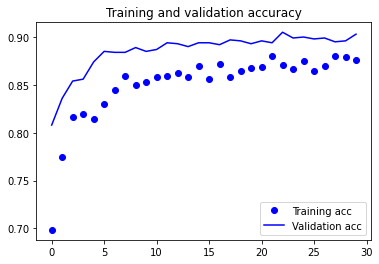

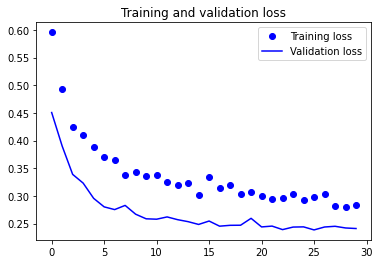

In [ ]:
acc = memoryM.history['acc']
val_acc = memoryM.history['val_acc']
loss = memoryM.history['loss']
val_loss = memoryM.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Until here the procedure is exactly like before, but from now on you will see fine-tuning technique.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate = 1e-5), metrics=['acc'])

In [ ]:
memoryM1 = model.fit(
      train_generator,
      steps_per_epoch = 100,
      epochs = 100,
      validation_data = validation_generator,
      validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 23s 209ms/step - loss: 0.3074 - acc: 0.8710 - val_loss: 0.2226 - val_acc: 0.9050
Epoch 2/100
100/100 [==============================] - 21s 209ms/step - loss: 0.2615 - acc: 0.8855 - val_loss: 0.2382 - val_acc: 0.9010
Epoch 3/100
100/100 [==============================] - 21s 207ms/step - loss: 0.2444 - acc: 0.8985 - val_loss: 0.1932 - val_acc: 0.9220
Epoch 4/100
100/100 [==============================] - 21s 207ms/step - loss: 0.2185 - acc: 0.9025 - val_loss: 0.1954 - val_acc: 0.9170
Epoch 5/100
100/100 [==============================] - 21s 208ms/step - loss: 0.2128 - acc: 0.9120 - val_loss: 0.1925 - val_acc: 0.9160
Epoch 6/100
100/100 [==============================] - 21s 206ms/step - loss: 0.2015 - acc: 0.9125 - val_loss: 0.1932 - val_acc: 0.9260
Epoch 7/100
100/100 [==============================] - 21s 207ms/step - loss: 0.1789 - acc: 0.9260 - val_loss: 0.1843 - val_acc: 0.9240
Epoch 8/100
100/100 [===========================

In [ ]:
model.save('cats_and_dogs_transferL4.h5')

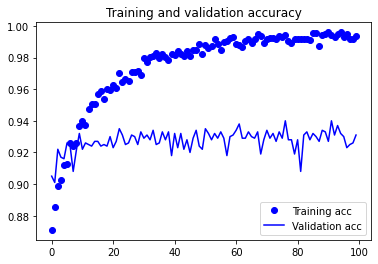

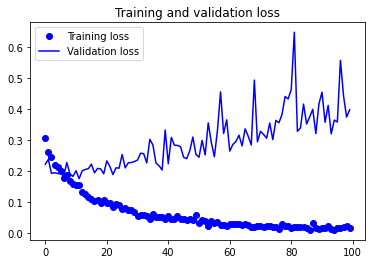

In [ ]:
acc = memoryM1.history['acc']
val_acc = memoryM1.history['val_acc']
loss = memoryM1.history['loss']
val_loss = memoryM1.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

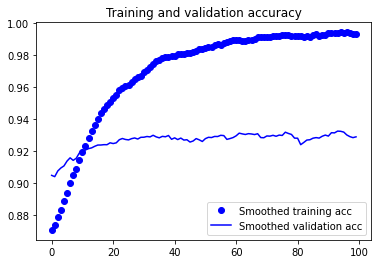

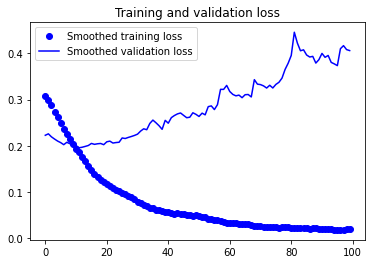

In [ ]:
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagenerator.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


test acc: 0.9340000152587891
